In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no null values and all values are numerical values

In [6]:
#Statistical measures of the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Correlstion of Quality with features columns

In [7]:
# correlation of quality with other columns
data.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

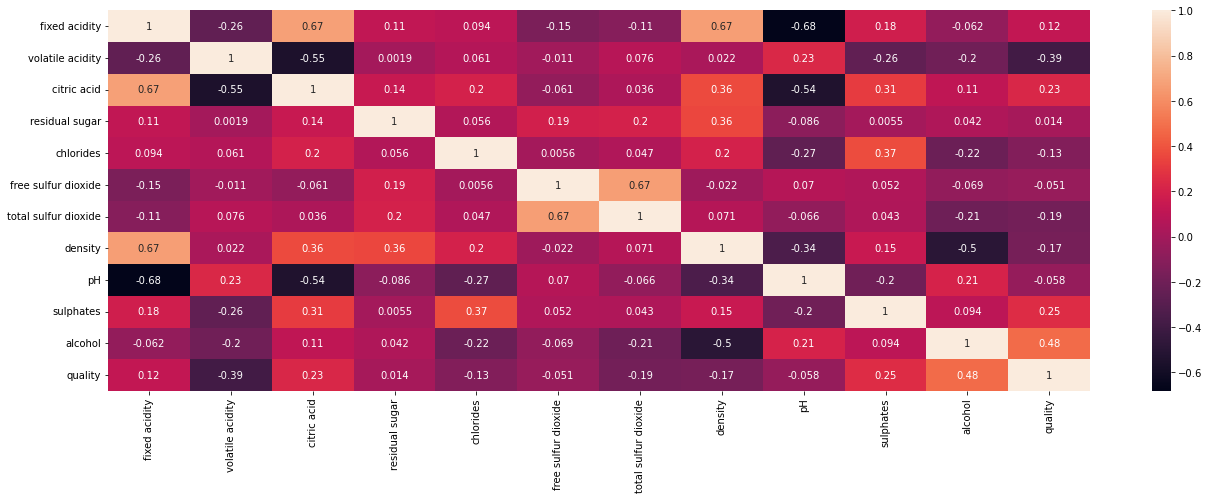

In [8]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, 'correlation')

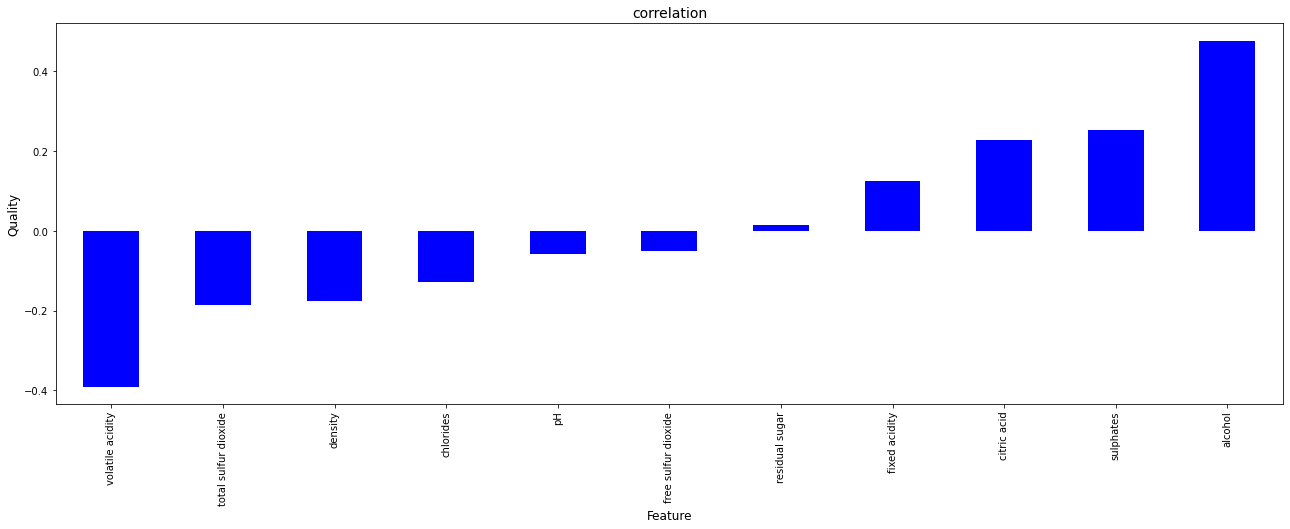

In [9]:
plt.figure(figsize=(22,7))
data.corr()['quality'].sort_values().drop(['quality']).plot(kind='bar',color='b')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.title('correlation', fontsize=14)

# Preprocessing data for ML algorithm

In [10]:
data['quality']=data['quality'].apply(lambda i:1 if i>=7 else 0)

In [11]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

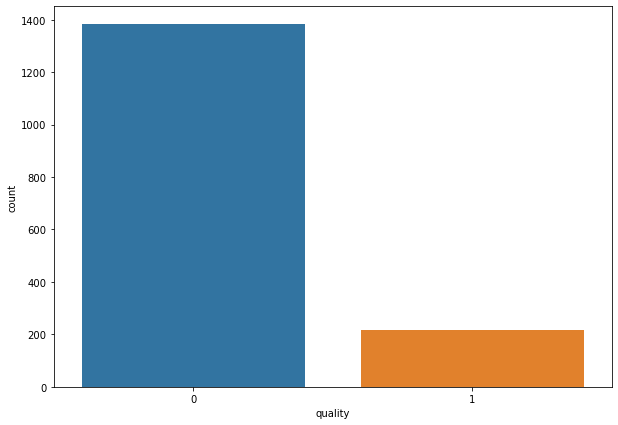

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(data['quality'])

# Split into Train and Test (Validation) sets and Model training

In [13]:
x=data.drop(columns=['quality'], axis=1)

In [14]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
y=data['quality']

In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [17]:
logmodel = LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    logmodel.fit(x_train,y_train)
    pred_train=logmodel.predict(x_train)
    pred_test=logmodel.predict(x_test) 
    if (accuracy_score(y_train,pred_train)*100>88 and accuracy_score(y_test,pred_test)*100>88):
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_train,pred_train))
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_test,pred_test))
                      print("\n")

At random state 13 the training accuracy is 0.8803752931978108
At random state 13 the training accuracy is 0.884375


At random state 22 the training accuracy is 0.8866301798279906
At random state 22 the training accuracy is 0.884375


At random state 23 the training accuracy is 0.8827208756841283
At random state 23 the training accuracy is 0.884375


At random state 65 the training accuracy is 0.8811571540265832
At random state 65 the training accuracy is 0.884375


At random state 71 the training accuracy is 0.8811571540265832
At random state 71 the training accuracy is 0.88125


At random state 94 the training accuracy is 0.8827208756841283
At random state 94 the training accuracy is 0.890625


At random state 96 the training accuracy is 0.8819390148553558
At random state 96 the training accuracy is 0.88125




At random state 22 we are having best accuracy of the model

In [33]:
#Spliting the data into test and train set
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=22)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

# Model Training

In [36]:
# training the logistic regression model with training data
logmodel.fit(x_train,y_train)

LogisticRegression()

In [37]:
#accuracy on training data
pred_test = logmodel.predict(x_test)
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[265  11]
 [ 28  16]]
0.878125
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       276
           1       0.59      0.36      0.45        44

    accuracy                           0.88       320
   macro avg       0.75      0.66      0.69       320
weighted avg       0.86      0.88      0.87       320



Cross validation of the model

In [38]:
# Finding best value of fold (j)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(logmodel,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"AT cross fold {j} the cv score is {cv_mean}")
    print('\n')

AT cross fold 2 the cv score is 0.8574037859824781


AT cross fold 3 the cv score is 0.882426516572858


AT cross fold 4 the cv score is 0.871796679197995


AT cross fold 5 the cv score is 0.869919670846395


AT cross fold 6 the cv score is 0.8742948194456178


AT cross fold 7 the cv score is 0.8736770966718106


AT cross fold 8 the cv score is 0.8730402010050251


AT cross fold 9 the cv score is 0.8755369347637488




At cross fold 3 we are getting nearest value to our accuracy score. Hence we will use this value.

In [39]:
cv_score=cross_val_score(logmodel,x,y,cv=3)
cv_mean=cv_score.mean()
print(f"AT cross fold 2 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test)-cv_mean)

AT cross fold 2 the cv score is 0.882426516572858
Difference between accuracy and validation score -0.004301516572857933


RandomForestClassifier

In [40]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_test_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,pred_test_rfc))
print(confusion_matrix(y_test,pred_test_rfc))
print(classification_report(y_test,pred_test_rfc))

0.925
[[272   4]
 [ 20  24]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       276
           1       0.86      0.55      0.67        44

    accuracy                           0.93       320
   macro avg       0.89      0.77      0.81       320
weighted avg       0.92      0.93      0.92       320



In [41]:
# cross validation of RandomForestClassifier model
cv_score=cross_val_score(rfc,x,y,cv=3)
cv_mean=cv_score.mean()
print(f"AT cross fold 3 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_rfc)-cv_mean)

AT cross fold 3 the cv score is 0.882426516572858
Difference between accuracy and validation score 0.04257348342714207


In [42]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [43]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
print(accuracy_score(y_test,pred_test_gb))
print(confusion_matrix(y_test,pred_test_gb))
print(classification_report(y_test,pred_test_gb))

0.88125
[[265  11]
 [ 27  17]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       276
           1       0.61      0.39      0.47        44

    accuracy                           0.88       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.87      0.88      0.87       320



In [44]:
# cross validation of GradientBoostingClassifier model
cv_score=cross_val_score(gb,x,y,cv=3)
cv_mean=cv_score.mean()
print(f"AT cross fold 3 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_gb)-cv_mean)

AT cross fold 3 the cv score is 0.8592870544090055
Difference between accuracy and validation score 0.02196294559099443


AdaBoostClassifier

In [45]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred_test_ada=ada.predict(x_test)
print(accuracy_score(y_test,pred_test_ada))
print(confusion_matrix(y_test,pred_test_ada))
print(classification_report(y_test,pred_test_ada))

0.85625
[[261  15]
 [ 31  13]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       276
           1       0.46      0.30      0.36        44

    accuracy                           0.86       320
   macro avg       0.68      0.62      0.64       320
weighted avg       0.83      0.86      0.84       320



In [47]:
# cross validation of AdaBoostClassifier model
cv_score=cross_val_score(ada,x,y,cv=3)
cv_mean=cv_score.mean()
print(f"AT cross fold 3 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_ada)-cv_mean)

AT cross fold 3 the cv score is 0.8492808005003126
Difference between accuracy and validation score 0.0069691994996873285


# Tuning

In [48]:
from sklearn.model_selection import RandomizedSearchCV

parameters={
    
    "max_depth":[3,5,8],
    "max_features":["auto", "sqrt", "log2"],
    "criterion":["gini", "entropy"],
    "n_estimators":[50,100,150]
    }

In [49]:
clf=RandomizedSearchCV(RandomForestClassifier(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'n_estimators': 150, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


In [59]:
Tuned_model=RandomForestClassifier(n_estimators= 150, max_features='auto', max_depth= 8, criterion= 'gini')
Tuned_model.fit(x_train, y_train)
results=Tuned_model.predict(x_test)
print(accuracy_score(y_test,results)*100)

90.3125


In [52]:
# cross validation of Tuned_model
cv_score=cross_val_score(Tuned_model,x,y,cv=3)
cv_mean=cv_score.mean()
print(f"AT cross fold 3 the cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_ada)-cv_mean)

AT cross fold 3 the cv score is 0.8792995622263916
Difference between accuracy and validation score -0.02304956222639165


# Saving the model

Since RandomForestClassifier is providing the best accuarcy so we will save the rfc model

In [60]:
import pickle
filename='red_wine_quality.pkl'
pickle.dump(rfc, open(filename,'wb'))

# Building a Predictive system

In [61]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
# changing data into numpy array

input_data_as_numpy_array=np.asarray(input_data)

#reshaping the data as we are predicting the lable for only one instace
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=rfc.predict(input_data_reshaped)


if(prediction)[0]==1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Bad Quality Wine
